In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.simplefilter("ignore")

In [3]:
#pip install -r requirements.txt

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df = pd.read_csv("Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.rename(columns={"Annual Income (k$)":"Income","Spending Score (1-100)":"Score"},inplace=True)

In [8]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [9]:
df.drop(columns=['CustomerID',],inplace=True) 

In [10]:
df.drop(columns=['Gender','Age'],inplace=True) # reason...to see the scatterplot

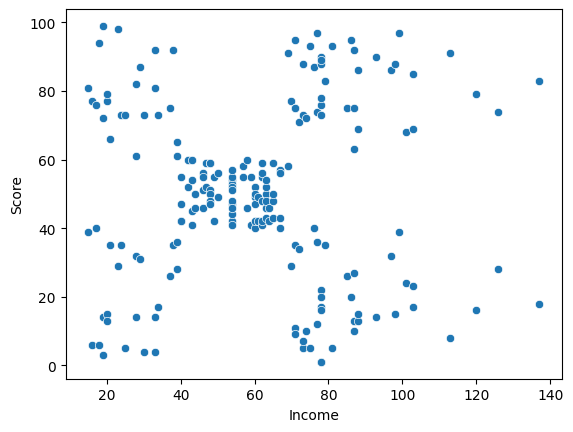

In [11]:
sns.scatterplot(x="Income",y="Score",data=df)
plt.show()

In [12]:
x = df
x
# y = nothing this unlabbled data...no output will be there..

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
# WCSS stands for Within-Cluster Sum of Squares.
wcss = []
for k in range(1,11): # most probably this limit is enough to find optimum no. of clusters
    from sklearn.cluster import KMeans
    kmeans=KMeans(n_clusters= k,init = "k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) # inertia means sum of squares of distances..

print(wcss)

[269981.28, 185917.1425392852, 106348.37306211122, 73880.64496247195, 44448.4554479337, 38814.850052563714, 30241.34361793658, 28382.177654552743, 23533.883426353415, 20269.042520431456]


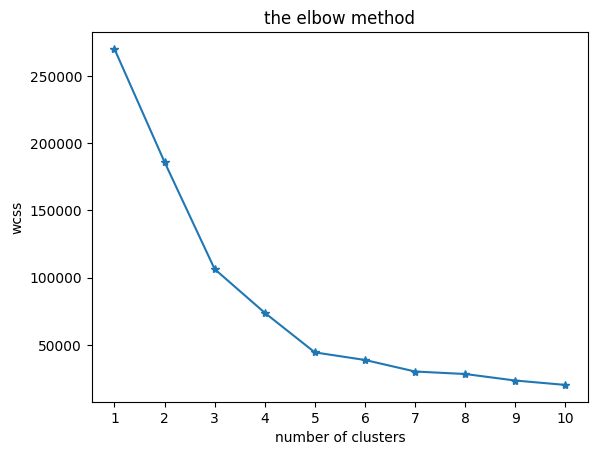

In [14]:
# using elbow method..
plt.plot(range(1,11),wcss,marker="*") 
# it is an axis based means,(x-axis,y-axis,more..)
# range is for representing the line btw that range 
plt.xticks(range(1,11))
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

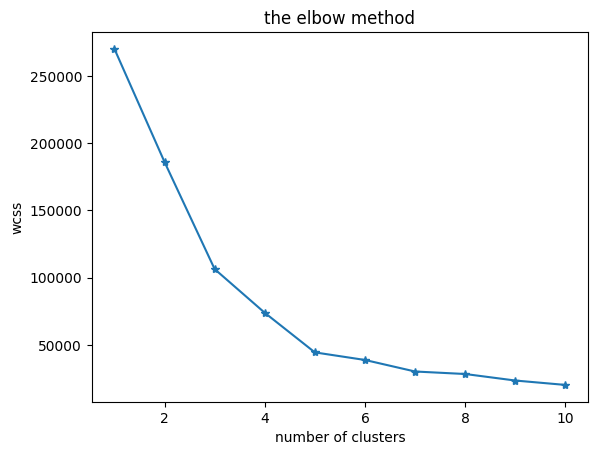

In [31]:
# using elbow method..
plt.plot(range(1,11),wcss,marker="*") 
# it is an axis based means,(x-axis,y-axis,more..)
# range is for representing the line btw that range 
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [16]:
# from the above number of clusters should we take is (n_clusters = 5)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=True)

# fit and predict
x["km_cluster"] = kmeans.fit_predict(x)


In [17]:
x[x["km_cluster"]==2]

,Income,Score,km_cluster
1,15,81,2
3,16,77,2
5,17,76,2
7,18,94,2
9,19,72,2
11,19,99,2
13,20,77,2
15,20,79,2
17,21,66,2
19,23,98,2


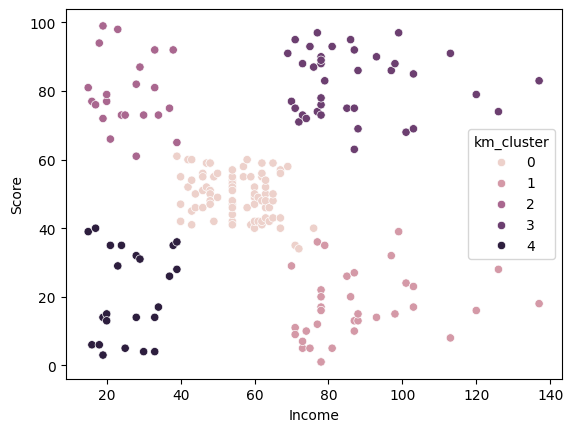

In [18]:
sns.scatterplot(x="Income",y="Score",data=df,hue="km_cluster")
plt.show()

# Hierarchy clustering...

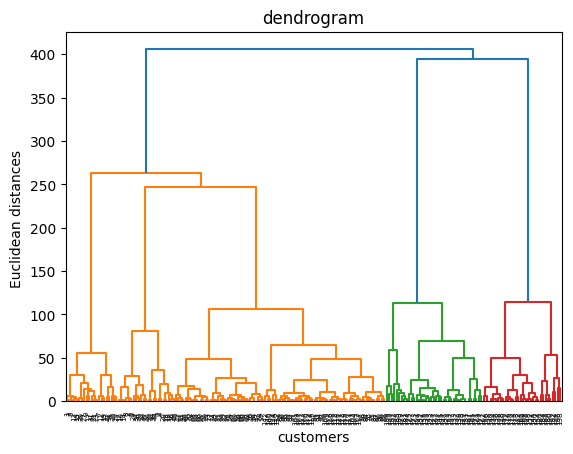

In [19]:
import scipy.cluster.hierarchy as sch
data = sch.linkage(x, method="ward") #ward means centroid calculates distances from centroid
dendrogram = sch.dendrogram(data)

plt.title("dendrogram")
plt.xlabel("customers")
plt.ylabel("Euclidean distances ")
plt.show()

# from the above below 200 are the cluster numbers...total 5 are there in the above dendrogram (we hv to draw a line at (400/2)=200)

In [20]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, metric = "euclidean" ,linkage= "ward")

x["h_cluster"] = hc.fit_predict(x)
x

,Income,Score,km_cluster,h_cluster
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,3,2
196,126,28,1,0
197,126,74,3,2
198,137,18,1,0


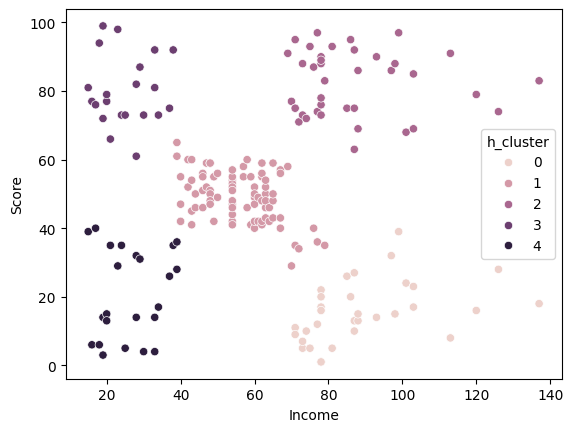

In [21]:
sns.scatterplot(x="Income",y="Score",data=df,hue="h_cluster")
plt.show()

In [22]:
x

,Income,Score,km_cluster,h_cluster
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,3,2
196,126,28,1,0
197,126,74,3,2
198,137,18,1,0


# DBSCAN

In [23]:
for r in range(1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs = DBSCAN(eps=r,min_samples=m)
        x["db_cluster"] = dbs.fit_predict(x)

    if  x["db_cluster"].nunique()==5:
        break
    
print("eps :", r)
print("min samples :", m)        

eps : 8
min samples : 9


In [24]:
x["db_cluster"].unique()

array([-1,  0,  3,  1,  2], dtype=int64)

In [25]:
x["db_cluster"].nunique()

5


# first kmeans chesake dbscan cheyyaali anta endukante k value kosam last if statement k value thone check mari chusuko jara
        
        # r tho radius draw chesi andulo enni data points unnayo m value tho check cheyyaali...
        # alaa prathi data point ki radius draw chesi check cheyyaali
        # radius tho draw chesinappudu andulo >1 and <m then...border point
        # radius tho draw chesinappudu andulo >=m then...core point
        # radius tho draw chesinappudu andulo 1 data point unte...outlier thammudu
        # eps is radius and m is defining outlier/border_poit/core_point
        # m values three thone enduku start ayyaayi...appude cheppagalam mari outlier/border_poit/core_point ani
        # thats y m minumum value must be 3...
# manam prathi point ki radius draw chesthunnam kada...deni chuttu aite draw chesthunamo...alaantivi points overlap aite aa rendu kalipi oka cluster kindaki vasthaayi

In [26]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=8,min_samples=9)
x["db_cluster"] = dbs.fit_predict(x)
x["db_cluster"].unique()

array([-1,  0,  3,  1,  2], dtype=int64)

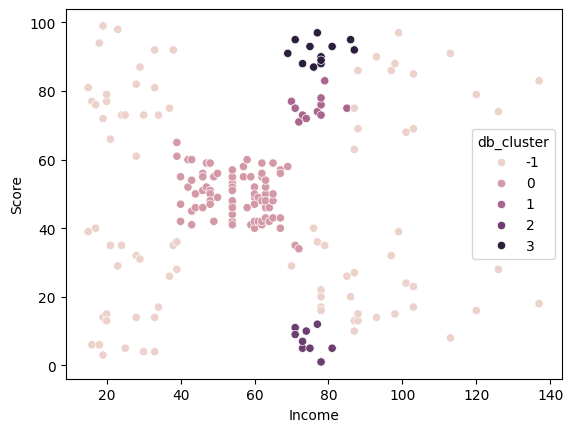

In [27]:
sns.scatterplot(x="Income",y="Score",data=df,hue="db_cluster")
plt.show()

# **KMeans** to identify optimum no of clusters....k = 5
# **DBSCAN** to identify outliers...
    # density based spatial clustering applications with noise
# **HEIRARCHY** dendrogram is there due to that...besides clusters can be identified easily

In [28]:
x

,Income,Score,km_cluster,h_cluster,db_cluster
0,15,39,4,4,-1
1,15,81,2,3,-1
2,16,6,4,4,-1
3,16,77,2,3,-1
4,17,40,4,4,-1
...,...,...,...,...,...
195,120,79,3,2,-1
196,126,28,1,0,-1
197,126,74,3,2,-1
198,137,18,1,0,-1
